[View in Colaboratory](https://colab.research.google.com/github/ritikagr/Identify_Product_Category/blob/master/Identify_The_Product_Category.ipynb)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import warnings
import os
import pickle

from __future__ import print_function
!pip install keras
from keras.models import Model,Sequential, load_model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import backend as K
!pip install keras-vis
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_activation, get_num_filters
from vis.input_modifiers import Jitter
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
!wget "https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip" -O ProductImg

--2018-04-03 17:24:25--  https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.40.72
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.40.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534082470 (509M) [application/zip]
Saving to: ‘ProductImg’

ProductImg           16%[==>                 ]  86.29M  8.81MB/s    eta 4m 8s  

ProductImg          100%[===================>] 509.34M  11.5MB/s    in 82s     

2018-04-03 17:25:48 (6.23 MB/s) - ‘ProductImg’ saved [534082470/534082470]



In [0]:
!unzip ProductImg

Archive:  ProductImg
  inflating: sample_submission.csv   
  inflating: test.csv                
   creating: test_img/
  inflating: test_img/test_1000a.png  
  inflating: test_img/test_1000b.png  
  inflating: test_img/test_1000c.png  
  inflating: test_img/test_1000d.png  
  inflating: test_img/test_1001a.png  
  inflating: test_img/test_1001b.png  
  inflating: test_img/test_1001c.png  
  inflating: test_img/test_1001d.png  
  inflating: test_img/test_1002a.png  
  inflating: test_img/test_1002b.png  
  inflating: test_img/test_1002c.png  
  inflating: test_img/test_1002d.png  
  inflating: test_img/test_1003a.png  
  inflating: test_img/test_1003b.png  
  inflating: test_img/test_1003c.png  
  inflating: test_img/test_1003d.png  
  inflating: test_img/test_1004a.png  
  inflating: test_img/test_1004b.png  
  inflating: test_img/test_1004c.png  
  inflating: test_img/test_1004d.png  
  inflating: test_img/test_1005a.png  
  inflating: test_img/test_1005b.png  
  inflating: test_img/


  inflating: test_img/test_1130b.png  
  inflating: test_img/test_1130c.png  
  inflating: test_img/test_1130d.png  
  inflating: test_img/test_1131a.png  
  inflating: test_img/test_1131b.png  
  inflating: test_img/test_1131c.png  
  inflating: test_img/test_1131d.png  
  inflating: test_img/test_1132a.png  
  inflating: test_img/test_1132b.png  
  inflating: test_img/test_1132c.png  
  inflating: test_img/test_1132d.png  
  inflating: test_img/test_1133a.png  
  inflating: test_img/test_1133b.png  
  inflating: test_img/test_1133c.png  
  inflating: test_img/test_1133d.png  
  inflating: test_img/test_1134a.png  
  inflating: test_img/test_1134b.png  
  inflating: test_img/test_1134c.png  
  inflating: test_img/test_1134d.png  
  inflating: test_img/test_1135a.png  
  inflating: test_img/test_1135b.png  
  inflating: test_img/test_1135c.png  
  inflating: test_img/test_1135d.png  
  inflating: test_img/test_1136a.png  
  inflating: test_img/test_1136b.png  
  inflating: test_img/te


  inflating: test_img/test_1252b.png  
  inflating: test_img/test_1252c.png  
  inflating: test_img/test_1252d.png  
  inflating: test_img/test_1253a.png  
  inflating: test_img/test_1253b.png  
  inflating: test_img/test_1253c.png  
  inflating: test_img/test_1253d.png  
  inflating: test_img/test_1254a.png  
  inflating: test_img/test_1254b.png  
  inflating: test_img/test_1254c.png  
  inflating: test_img/test_1254d.png  
  inflating: test_img/test_1255a.png  
  inflating: test_img/test_1255b.png  
  inflating: test_img/test_1255c.png  
  inflating: test_img/test_1255d.png  
  inflating: test_img/test_1256a.png  
  inflating: test_img/test_1256b.png  
  inflating: test_img/test_1256c.png  
  inflating: test_img/test_1256d.png  
  inflating: test_img/test_1257a.png  
  inflating: test_img/test_1257b.png  
  inflating: test_img/test_1257c.png  
  inflating: test_img/test_1257d.png  
  inflating: test_img/test_1258a.png  
  inflating: test_img/test_1258b.png  
  inflating: test_img/te

  inflating: test_img/test_1381d.png  
  inflating: test_img/test_1382a.png  
  inflating: test_img/test_1382b.png  
  inflating: test_img/test_1382c.png  
  inflating: test_img/test_1382d.png  
  inflating: test_img/test_1383a.png  
  inflating: test_img/test_1383b.png  
  inflating: test_img/test_1383c.png  
  inflating: test_img/test_1383d.png  
  inflating: test_img/test_1384a.png  
  inflating: test_img/test_1384b.png  
  inflating: test_img/test_1384c.png  
  inflating: test_img/test_1384d.png  
  inflating: test_img/test_1385a.png  
  inflating: test_img/test_1385b.png  
  inflating: test_img/test_1385c.png  
  inflating: test_img/test_1385d.png  
  inflating: test_img/test_1386a.png  
  inflating: test_img/test_1386b.png  
  inflating: test_img/test_1386c.png  
  inflating: test_img/test_1386d.png  
  inflating: test_img/test_1387a.png  
  inflating: test_img/test_1387b.png  
  inflating: test_img/test_1387c.png  
  inflating: test_img/test_1387d.png  
  inflating: test_img/tes


  inflating: train_img/train_175c.png  
  inflating: train_img/train_175d.png  
  inflating: train_img/train_176a.png  
  inflating: train_img/train_176b.png  
  inflating: train_img/train_176c.png  
  inflating: train_img/train_176d.png  
  inflating: train_img/train_177a.png  
  inflating: train_img/train_177b.png  
  inflating: train_img/train_177c.png  
  inflating: train_img/train_177d.png  
  inflating: train_img/train_178a.png  
  inflating: train_img/train_178b.png  
  inflating: train_img/train_178c.png  
  inflating: train_img/train_178d.png  
  inflating: train_img/train_179a.png  
  inflating: train_img/train_179b.png  
  inflating: train_img/train_179c.png  
  inflating: train_img/train_179d.png  
  inflating: train_img/train_17a.png  
  inflating: train_img/train_17b.png  
  inflating: train_img/train_17c.png  
  inflating: train_img/train_17d.png  
  inflating: train_img/train_180a.png  
  inflating: train_img/train_180b.png  
  inflating: train_img/train_180c.png  
  i


  inflating: train_img/train_285a.png  
  inflating: train_img/train_285b.png  
  inflating: train_img/train_285c.png  
  inflating: train_img/train_285d.png  
  inflating: train_img/train_286a.png  
  inflating: train_img/train_286b.png  
  inflating: train_img/train_286c.png  
  inflating: train_img/train_286d.png  
  inflating: train_img/train_287a.png  
  inflating: train_img/train_287b.png  
  inflating: train_img/train_287c.png  
  inflating: train_img/train_287d.png  
  inflating: train_img/train_288a.png  
  inflating: train_img/train_288b.png  
  inflating: train_img/train_288c.png  
  inflating: train_img/train_288d.png  
  inflating: train_img/train_289a.png  
  inflating: train_img/train_289b.png  
  inflating: train_img/train_289c.png  
  inflating: train_img/train_289d.png  
  inflating: train_img/train_28a.png  
  inflating: train_img/train_28b.png  
  inflating: train_img/train_28c.png  
  inflating: train_img/train_28d.png  
  inflating: train_img/train_290a.png  
  i


  inflating: train_img/train_394d.png  
  inflating: train_img/train_395a.png  
  inflating: train_img/train_395b.png  
  inflating: train_img/train_395c.png  
  inflating: train_img/train_395d.png  
  inflating: train_img/train_396a.png  
  inflating: train_img/train_396b.png  
  inflating: train_img/train_396c.png  
  inflating: train_img/train_396d.png  
  inflating: train_img/train_397a.png  
  inflating: train_img/train_397b.png  
  inflating: train_img/train_397c.png  
  inflating: train_img/train_397d.png  
  inflating: train_img/train_398a.png  
  inflating: train_img/train_398b.png  
  inflating: train_img/train_398c.png  
  inflating: train_img/train_398d.png  
  inflating: train_img/train_399a.png  
  inflating: train_img/train_399b.png  
  inflating: train_img/train_399c.png  
  inflating: train_img/train_399d.png  
  inflating: train_img/train_39a.png  
  inflating: train_img/train_39b.png  
  inflating: train_img/train_39c.png  
  inflating: train_img/train_39d.png  
  i


  inflating: train_img/train_498c.png  
  inflating: train_img/train_498d.png  
  inflating: train_img/train_499a.png  
  inflating: train_img/train_499b.png  
  inflating: train_img/train_499c.png  
  inflating: train_img/train_499d.png  
  inflating: train_img/train_49a.png  
  inflating: train_img/train_49b.png  
  inflating: train_img/train_49c.png  
  inflating: train_img/train_49d.png  
  inflating: train_img/train_4a.png  
  inflating: train_img/train_4b.png  
  inflating: train_img/train_4c.png  
  inflating: train_img/train_4d.png  
  inflating: train_img/train_500a.png  
  inflating: train_img/train_500b.png  
  inflating: train_img/train_500c.png  
  inflating: train_img/train_500d.png  
  inflating: train_img/train_501a.png  
  inflating: train_img/train_501b.png  
  inflating: train_img/train_501c.png  
  inflating: train_img/train_501d.png  
  inflating: train_img/train_502a.png  
  inflating: train_img/train_502b.png  
  inflating: train_img/train_502c.png  
  inflating


  inflating: train_img/train_609b.png  
  inflating: train_img/train_609c.png  
  inflating: train_img/train_609d.png  
  inflating: train_img/train_60a.png  
  inflating: train_img/train_60b.png  
  inflating: train_img/train_60c.png  
  inflating: train_img/train_60d.png  
  inflating: train_img/train_610a.png  
  inflating: train_img/train_610b.png  
  inflating: train_img/train_610c.png  
  inflating: train_img/train_610d.png  
  inflating: train_img/train_611a.png  
  inflating: train_img/train_611b.png  
  inflating: train_img/train_611c.png  
  inflating: train_img/train_611d.png  
  inflating: train_img/train_612a.png  
  inflating: train_img/train_612b.png  
  inflating: train_img/train_612c.png  
  inflating: train_img/train_612d.png  
  inflating: train_img/train_613a.png  
  inflating: train_img/train_613b.png  
  inflating: train_img/train_613c.png  
  inflating: train_img/train_613d.png  
  inflating: train_img/train_614a.png  
  inflating: train_img/train_614b.png  
  i


  inflating: train_img/train_709a.png  
  inflating: train_img/train_709b.png  
  inflating: train_img/train_709c.png  
  inflating: train_img/train_709d.png  
  inflating: train_img/train_70a.png  
  inflating: train_img/train_70b.png  
  inflating: train_img/train_70c.png  
  inflating: train_img/train_70d.png  
  inflating: train_img/train_710a.png  
  inflating: train_img/train_710b.png  
  inflating: train_img/train_710c.png  
  inflating: train_img/train_710d.png  
  inflating: train_img/train_711a.png  
  inflating: train_img/train_711b.png  
  inflating: train_img/train_711c.png  
  inflating: train_img/train_711d.png  
  inflating: train_img/train_712a.png  
  inflating: train_img/train_712b.png  
  inflating: train_img/train_712c.png  
  inflating: train_img/train_712d.png  
  inflating: train_img/train_713a.png  
  inflating: train_img/train_713b.png  
  inflating: train_img/train_713c.png  
  inflating: train_img/train_713d.png  
  inflating: train_img/train_714a.png  
  i


  inflating: train_img/train_98c.png  
  inflating: train_img/train_98d.png  
  inflating: train_img/train_99a.png  
  inflating: train_img/train_99b.png  
  inflating: train_img/train_99c.png  
  inflating: train_img/train_99d.png  
  inflating: train_img/train_9a.png  
  inflating: train_img/train_9b.png  
  inflating: train_img/train_9c.png  
  inflating: train_img/train_9d.png  


In [1]:
!ls

ProductImg  sample_submission.csv  test.csv  test_img  train.csv  train_img


In [0]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['acc'])
    acc = smooth_curve(history.history['acc'][:steps])
    val_acc = smooth_curve(history.history['val_acc'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x
 
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


In [0]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 3215 images.
The test data has 1732 images.


In [0]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))

The train data has 25 unique labels


In [0]:
TRAIN_PATH = 'train_img/'
TEST_PATH = 'test_img/'

In [0]:
# function to read images as arrays
def readImg(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,256))
    return img

In [0]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in train['image_id'].values:
  train_data.append(readImg(TRAIN_PATH + '{}.png'.format(img)))
  
for img in test['image_id'].values:
  test_data.append(readImg(TEST_PATH + '{}.png'.format(img)))
  


In [0]:
x_train = np.array(train_data, np.float32) /255
x_test = np.array(test_data, np.float32) /255

In [0]:
label_list = train['label'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

y_train

[8,
 13,
 17,
 6,
 21,
 1,
 16,
 2,
 7,
 13,
 7,
 7,
 13,
 15,
 6,
 8,
 1,
 11,
 7,
 10,
 23,
 20,
 24,
 23,
 15,
 24,
 13,
 1,
 19,
 18,
 8,
 24,
 10,
 7,
 6,
 20,
 17,
 12,
 7,
 8,
 6,
 1,
 15,
 21,
 25,
 22,
 13,
 24,
 23,
 24,
 7,
 12,
 3,
 8,
 13,
 3,
 5,
 13,
 1,
 17,
 2,
 6,
 5,
 17,
 21,
 5,
 24,
 25,
 8,
 1,
 25,
 13,
 9,
 11,
 6,
 12,
 6,
 21,
 17,
 6,
 5,
 6,
 1,
 18,
 15,
 12,
 4,
 14,
 10,
 14,
 23,
 7,
 10,
 13,
 9,
 24,
 25,
 19,
 1,
 24,
 4,
 9,
 11,
 6,
 23,
 21,
 5,
 18,
 7,
 3,
 13,
 8,
 20,
 3,
 9,
 2,
 13,
 24,
 15,
 11,
 2,
 24,
 23,
 1,
 1,
 24,
 15,
 2,
 12,
 17,
 1,
 14,
 9,
 3,
 11,
 15,
 24,
 1,
 19,
 8,
 1,
 24,
 13,
 10,
 12,
 1,
 5,
 11,
 15,
 16,
 12,
 3,
 24,
 13,
 1,
 18,
 13,
 6,
 13,
 8,
 7,
 3,
 3,
 20,
 14,
 11,
 5,
 6,
 2,
 8,
 1,
 1,
 11,
 10,
 8,
 7,
 1,
 14,
 13,
 13,
 24,
 13,
 1,
 23,
 19,
 23,
 1,
 13,
 10,
 22,
 8,
 4,
 6,
 3,
 8,
 13,
 12,
 2,
 10,
 15,
 8,
 17,
 12,
 1,
 8,
 3,
 10,
 21,
 6,
 18,
 17,
 18,
 7,
 22,
 5,
 16,
 6,
 12,
 8,
 1

In [0]:

from keras import applications
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [0]:
y_train = to_categorical(y_train)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same',name = 'conv1', input_shape = (256,256,3)))
model.add(Conv2D(32, (3,3), activation='relu' ,name = 'conv2'))
model.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool_1'))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', name = 'conv3'))
model.add(Conv2D(64, (3,3), activation='relu', name = 'conv4'))
model.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool_2'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', name = 'conv5'))
model.add(Conv2D(128, (3,3), activation='relu', name='conv6'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dense(256, activation='relu', name='dense_2'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax', name='output'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 128, 128, 32)      896       
_________________________________________________________________
conv2 (Conv2D)               (None, 126, 126, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 63, 63, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 63, 63, 64)        18496     
_________________________________________________________________
conv4 (Conv2D)               (None, 61, 61, 64)        36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 64)        0         
__________

In [0]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [0]:
history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_split=0.3)

Train on 2250 samples, validate on 965 samples
Epoch 1/30
2250/2250 [==============================] - 14s 6ms/step - loss: 3.2178 - acc: 0.0662 - val_loss: 3.1796 - val_acc: 0.0756
Epoch 2/30
2250/2250 [==============================] - 9s 4ms/step - loss: 3.1269 - acc: 0.0938 - val_loss: 3.0481 - val_acc: 0.1295
Epoch 3/30
2250/2250 [==============================] - 9s 4ms/step - loss: 3.0117 - acc: 0.1302 - val_loss: 2.9504 - val_acc: 0.1544
Epoch 4/30
2250/2250 [==============================] - 9s 4ms/step - loss: 2.9495 - acc: 0.1413 - val_loss: 2.9287 - val_acc: 0.1565
Epoch 5/30
2250/2250 [==============================] - 9s 4ms/step - loss: 2.8185 - acc: 0.1738 - val_loss: 2.8171 - val_acc: 0.1772
Epoch 6/30
2250/2250 [==============================] - 9s 4ms/step - loss: 2.6916 - acc: 0.1969 - val_loss: 2.7416 - val_acc: 0.2124
Epoch 7/30
2250/2250 [==============================] - 9s 4ms/step - loss: 2.5364 - acc: 0.2467 - val_loss: 2.6629 - val_acc: 0.2373
Epoch 8/30
 70

2250/2250 [==============================] - 9s 4ms/step - loss: 2.3052 - acc: 0.3156 - val_loss: 2.6205 - val_acc: 0.2591
Epoch 9/30
2250/2250 [==============================] - 9s 4ms/step - loss: 2.0421 - acc: 0.3760 - val_loss: 2.7274 - val_acc: 0.2332
Epoch 10/30
2250/2250 [==============================] - 9s 4ms/step - loss: 1.6707 - acc: 0.4809 - val_loss: 2.9342 - val_acc: 0.2404
Epoch 11/30
2250/2250 [==============================] - 9s 4ms/step - loss: 1.3164 - acc: 0.5987 - val_loss: 3.2196 - val_acc: 0.2404
Epoch 12/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.8806 - acc: 0.7209 - val_loss: 3.7423 - val_acc: 0.2249
Epoch 13/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.7072 - acc: 0.7689 - val_loss: 3.9940 - val_acc: 0.2487
Epoch 14/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.5194 - acc: 0.8387 - val_loss: 4.3514 - val_acc: 0.2435
Epoch 15/30
1700/2250 [=====================>........] - ETA: 1s - l

2250/2250 [==============================] - 9s 4ms/step - loss: 0.3578 - acc: 0.8947 - val_loss: 5.6168 - val_acc: 0.2187
Epoch 16/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.3081 - acc: 0.9022 - val_loss: 5.0271 - val_acc: 0.2352
Epoch 17/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.2439 - acc: 0.9218 - val_loss: 5.6384 - val_acc: 0.2301
Epoch 18/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.2126 - acc: 0.9347 - val_loss: 5.5090 - val_acc: 0.2352
Epoch 19/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1786 - acc: 0.9458 - val_loss: 6.4004 - val_acc: 0.2311
Epoch 20/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1535 - acc: 0.9516 - val_loss: 6.7074 - val_acc: 0.1979
Epoch 21/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1520 - acc: 0.9507 - val_loss: 6.1864 - val_acc: 0.2301
Epoch 22/30
1800/2250 [=======================>......] - ETA: 1s - 

2250/2250 [==============================] - 9s 4ms/step - loss: 0.1047 - acc: 0.9667 - val_loss: 6.4114 - val_acc: 0.2238
Epoch 23/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1047 - acc: 0.9676 - val_loss: 6.8203 - val_acc: 0.2104
Epoch 24/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1172 - acc: 0.9653 - val_loss: 6.7344 - val_acc: 0.2238
Epoch 25/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1156 - acc: 0.9640 - val_loss: 6.4939 - val_acc: 0.2145
Epoch 26/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.0803 - acc: 0.9773 - val_loss: 6.8788 - val_acc: 0.2363
Epoch 27/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1053 - acc: 0.9707 - val_loss: 7.0865 - val_acc: 0.2280
Epoch 28/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1569 - acc: 0.9502 - val_loss: 6.3175 - val_acc: 0.2166
Epoch 29/30
1800/2250 [=======================>......] - ETA: 1s - 

2250/2250 [==============================] - 9s 4ms/step - loss: 0.0685 - acc: 0.9809 - val_loss: 6.7821 - val_acc: 0.2363
Epoch 30/30
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1061 - acc: 0.9684 - val_loss: 6.5447 - val_acc: 0.2383


In [0]:
model.save('model.h5')
save_history(history, 'history.bin')

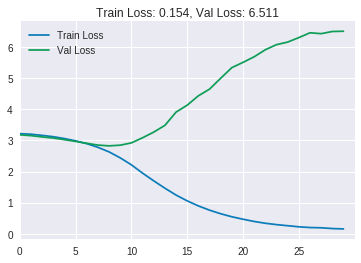

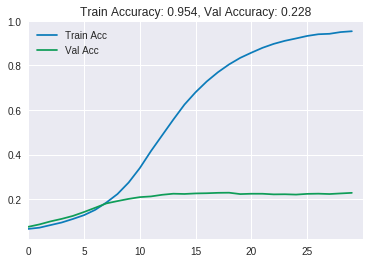

In [0]:
history = load_history('history.bin')
plot_compare(history)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print("Number of training Images is {}".format(x_train.shape[0]))
print("Number of validation Images is {}".format(x_val.shape[0]))

Number of training Images is 2250
Number of validation Images is 965


In [0]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

val_generator = validation_datagen.flow(x_val, y_val, batch_size=32)

In [0]:
model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', padding='same',name = 'conv1', input_shape = (256,256,3)))
model_aug.add(Conv2D(32, (3,3), activation='relu' ,name = 'conv2'))
model_aug.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool_1'))

model_aug.add(Conv2D(64, (3,3), activation='relu', padding='same', name = 'conv3'))
model_aug.add(Conv2D(64, (3,3), activation='relu', name = 'conv4'))
model_aug.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool_2'))
model_aug.add(Dropout(0.25))

model_aug.add(Conv2D(128, (3,3), activation='relu', padding='same', name = 'conv5'))
model_aug.add(Conv2D(128, (3,3), activation='relu', name='conv6'))
model_aug.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))
model_aug.add(Dropout(0.25))

model_aug.add(Flatten())
model_aug.add(Dense(128, activation='relu', name='dense_1'))
model_aug.add(Dense(256, activation='relu', name='dense_2'))
model_aug.add(Dropout(0.25))
model_aug.add(Dense(y_train.shape[1], activation='softmax', name='output'))
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_aug.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 128, 128, 32)      896       
_________________________________________________________________
conv2 (Conv2D)               (None, 126, 126, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 63, 63, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 63, 63, 64)        18496     
_________________________________________________________________
conv4 (Conv2D)               (None, 61, 61, 64)        36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)        0         
__________

In [0]:
# early_stop = EarlyStopping(monitor='val_loss', patience=6, verbose=1)
history_aug = model_aug.fit_generator(train_generator, steps_per_epoch=500, validation_data=val_generator, validation_steps=250, epochs=50, verbose=1)

Epoch 1/50
500/500 [==============================] - 97s 195ms/step - loss: 3.1706 - acc: 0.0720 - val_loss: 3.1741 - val_acc: 0.0707
Epoch 2/50
239/500 [=============>................] - ETA: 44s - loss: 3.1603 - acc: 0.0766

500/500 [==============================] - 95s 191ms/step - loss: 3.1555 - acc: 0.0743 - val_loss: 3.1723 - val_acc: 0.0708
Epoch 3/50
366/500 [====================>.........] - ETA: 22s - loss: 3.1537 - acc: 0.0766

500/500 [==============================] - 95s 189ms/step - loss: 3.1545 - acc: 0.0762 - val_loss: 3.1713 - val_acc: 0.0703
Epoch 4/50
414/500 [=======================>......] - ETA: 14s - loss: 3.1512 - acc: 0.0751

500/500 [==============================] - 95s 189ms/step - loss: 3.1484 - acc: 0.0755 - val_loss: 3.2602 - val_acc: 0.0726
Epoch 5/50
432/500 [========================>.....] - ETA: 11s - loss: 3.0974 - acc: 0.0857

500/500 [==============================] - 95s 190ms/step - loss: 3.0868 - acc: 0.0883 - val_loss: 2.9366 - val_acc: 0.1280
Epoch 6/50
438/500 [=========================>....] - ETA: 10s - loss: 2.8603 - acc: 0.1512

500/500 [==============================] - 95s 191ms/step - loss: 2.8471 - acc: 0.1555 - val_loss: 2.7307 - val_acc: 0.1995
Epoch 7/50
441/500 [=========================>....] - ETA: 9s - loss: 2.6799 - acc: 0.1982 

500/500 [==============================] - 95s 190ms/step - loss: 2.6758 - acc: 0.1984 - val_loss: 2.6139 - val_acc: 0.2208
Epoch 8/50
442/500 [=========================>....] - ETA: 9s - loss: 2.5712 - acc: 0.2253 

500/500 [==============================] - 95s 191ms/step - loss: 2.5583 - acc: 0.2270 - val_loss: 2.5649 - val_acc: 0.2609
Epoch 9/50
442/500 [=========================>....] - ETA: 9s - loss: 2.4648 - acc: 0.2515 

500/500 [==============================] - 95s 190ms/step - loss: 2.4582 - acc: 0.2526 - val_loss: 2.5377 - val_acc: 0.2388
Epoch 10/50
439/500 [=========================>....] - ETA: 10s - loss: 2.3790 - acc: 0.2757

500/500 [==============================] - 95s 189ms/step - loss: 2.3742 - acc: 0.2768 - val_loss: 2.4404 - val_acc: 0.2884
Epoch 11/50
436/500 [=========================>....] - ETA: 10s - loss: 2.2882 - acc: 0.2973

500/500 [==============================] - 94s 188ms/step - loss: 2.2866 - acc: 0.2982 - val_loss: 2.4435 - val_acc: 0.2795
Epoch 12/50
438/500 [=========================>....] - ETA: 10s - loss: 2.2068 - acc: 0.3156

500/500 [==============================] - 95s 190ms/step - loss: 2.2012 - acc: 0.3177 - val_loss: 2.3618 - val_acc: 0.2966
Epoch 13/50
437/500 [=========================>....] - ETA: 10s - loss: 2.1229 - acc: 0.3470

500/500 [==============================] - 95s 191ms/step - loss: 2.1216 - acc: 0.3466 - val_loss: 2.3701 - val_acc: 0.3173
Epoch 14/50
438/500 [=========================>....] - ETA: 10s - loss: 2.0635 - acc: 0.3587

500/500 [==============================] - 95s 190ms/step - loss: 2.0594 - acc: 0.3593 - val_loss: 2.3789 - val_acc: 0.2975
Epoch 15/50
439/500 [=========================>....] - ETA: 10s - loss: 1.9911 - acc: 0.3863

500/500 [==============================] - 95s 189ms/step - loss: 1.9857 - acc: 0.3868 - val_loss: 2.3207 - val_acc: 0.3199
Epoch 16/50
439/500 [=========================>....] - ETA: 10s - loss: 1.9112 - acc: 0.4036

500/500 [==============================] - 96s 192ms/step - loss: 1.9110 - acc: 0.4034 - val_loss: 2.3308 - val_acc: 0.3290
Epoch 17/50
439/500 [=========================>....] - ETA: 10s - loss: 1.8550 - acc: 0.4175

500/500 [==============================] - 96s 192ms/step - loss: 1.8536 - acc: 0.4175 - val_loss: 2.2865 - val_acc: 0.3642
Epoch 18/50
439/500 [=========================>....] - ETA: 10s - loss: 1.7746 - acc: 0.4445

500/500 [==============================] - 95s 190ms/step - loss: 1.7640 - acc: 0.4470 - val_loss: 2.3672 - val_acc: 0.3389
Epoch 19/50
438/500 [=========================>....] - ETA: 10s - loss: 1.7234 - acc: 0.4592

500/500 [==============================] - 95s 191ms/step - loss: 1.7159 - acc: 0.4617 - val_loss: 2.3850 - val_acc: 0.3448
Epoch 20/50
439/500 [=========================>....] - ETA: 10s - loss: 1.6826 - acc: 0.4742

500/500 [==============================] - 96s 191ms/step - loss: 1.6763 - acc: 0.4745 - val_loss: 2.3707 - val_acc: 0.3535
Epoch 21/50
439/500 [=========================>....] - ETA: 10s - loss: 1.6217 - acc: 0.4857

500/500 [==============================] - 96s 193ms/step - loss: 1.6191 - acc: 0.4867 - val_loss: 2.3328 - val_acc: 0.3762
Epoch 22/50
439/500 [=========================>....] - ETA: 10s - loss: 1.5621 - acc: 0.5071

500/500 [==============================] - 96s 192ms/step - loss: 1.5635 - acc: 0.5065 - val_loss: 2.3960 - val_acc: 0.3713
Epoch 23/50
439/500 [=========================>....] - ETA: 10s - loss: 1.5706 - acc: 0.5048

500/500 [==============================] - 96s 192ms/step - loss: 1.5628 - acc: 0.5080 - val_loss: 2.4181 - val_acc: 0.3765
Epoch 24/50
439/500 [=========================>....] - ETA: 10s - loss: 1.4933 - acc: 0.5310

500/500 [==============================] - 96s 193ms/step - loss: 1.4861 - acc: 0.5327 - val_loss: 2.4107 - val_acc: 0.3899
Epoch 25/50
439/500 [=========================>....] - ETA: 10s - loss: 1.4483 - acc: 0.5406

500/500 [==============================] - 95s 190ms/step - loss: 1.4467 - acc: 0.5407 - val_loss: 2.3569 - val_acc: 0.3993
Epoch 26/50
438/500 [=========================>....] - ETA: 10s - loss: 1.4890 - acc: 0.5287

500/500 [==============================] - 95s 190ms/step - loss: 1.4883 - acc: 0.5286 - val_loss: 2.2647 - val_acc: 0.4038
Epoch 27/50
439/500 [=========================>....] - ETA: 10s - loss: 1.3998 - acc: 0.5534

500/500 [==============================] - 94s 189ms/step - loss: 1.3981 - acc: 0.5532 - val_loss: 2.4266 - val_acc: 0.4027
Epoch 28/50
439/500 [=========================>....] - ETA: 10s - loss: 1.3289 - acc: 0.5738

500/500 [==============================] - 94s 189ms/step - loss: 1.3282 - acc: 0.5722 - val_loss: 2.3602 - val_acc: 0.4075
Epoch 29/50
439/500 [=========================>....] - ETA: 10s - loss: 1.3004 - acc: 0.5845

500/500 [==============================] - 94s 188ms/step - loss: 1.2947 - acc: 0.5862 - val_loss: 2.4135 - val_acc: 0.4070
Epoch 30/50
439/500 [=========================>....] - ETA: 10s - loss: 1.2511 - acc: 0.5982

500/500 [==============================] - 94s 189ms/step - loss: 1.2539 - acc: 0.5968 - val_loss: 2.3569 - val_acc: 0.4313
Epoch 31/50
438/500 [=========================>....] - ETA: 10s - loss: 1.2584 - acc: 0.5958

500/500 [==============================] - 94s 189ms/step - loss: 1.2584 - acc: 0.5963 - val_loss: 2.4622 - val_acc: 0.4067
Epoch 32/50
439/500 [=========================>....] - ETA: 10s - loss: 1.2215 - acc: 0.6067

500/500 [==============================] - 94s 189ms/step - loss: 1.2199 - acc: 0.6065 - val_loss: 2.4519 - val_acc: 0.4400
Epoch 33/50
438/500 [=========================>....] - ETA: 10s - loss: 1.1887 - acc: 0.6167

500/500 [==============================] - 94s 188ms/step - loss: 1.1840 - acc: 0.6167 - val_loss: 2.5767 - val_acc: 0.4175
Epoch 34/50
439/500 [=========================>....] - ETA: 10s - loss: 1.1570 - acc: 0.6232

500/500 [==============================] - 94s 189ms/step - loss: 1.1518 - acc: 0.6259 - val_loss: 2.4063 - val_acc: 0.4284
Epoch 35/50
439/500 [=========================>....] - ETA: 10s - loss: 1.1337 - acc: 0.6309

500/500 [==============================] - 95s 190ms/step - loss: 1.1372 - acc: 0.6302 - val_loss: 2.6317 - val_acc: 0.4110
Epoch 36/50
439/500 [=========================>....] - ETA: 10s - loss: 1.1198 - acc: 0.6366

500/500 [==============================] - 94s 189ms/step - loss: 1.1153 - acc: 0.6381 - val_loss: 2.5630 - val_acc: 0.4295
Epoch 37/50
440/500 [=========================>....] - ETA: 10s - loss: 1.0912 - acc: 0.6426

500/500 [==============================] - 94s 189ms/step - loss: 1.0958 - acc: 0.6420 - val_loss: 2.5838 - val_acc: 0.4132
Epoch 38/50
439/500 [=========================>....] - ETA: 10s - loss: 1.0746 - acc: 0.6536

500/500 [==============================] - 95s 191ms/step - loss: 1.0731 - acc: 0.6535 - val_loss: 2.5032 - val_acc: 0.4264
Epoch 39/50
437/500 [=========================>....] - ETA: 10s - loss: 1.0375 - acc: 0.6594

500/500 [==============================] - 94s 189ms/step - loss: 1.0406 - acc: 0.6600 - val_loss: 2.6012 - val_acc: 0.4219
Epoch 40/50
438/500 [=========================>....] - ETA: 10s - loss: 1.0452 - acc: 0.6642

500/500 [==============================] - 95s 190ms/step - loss: 1.0433 - acc: 0.6656 - val_loss: 2.6129 - val_acc: 0.4246
Epoch 41/50
439/500 [=========================>....] - ETA: 10s - loss: 1.0068 - acc: 0.6731

500/500 [==============================] - 95s 190ms/step - loss: 1.0055 - acc: 0.6740 - val_loss: 2.6807 - val_acc: 0.4138
Epoch 42/50
439/500 [=========================>....] - ETA: 10s - loss: 1.0047 - acc: 0.6732

500/500 [==============================] - 95s 191ms/step - loss: 1.0021 - acc: 0.6733 - val_loss: 2.6218 - val_acc: 0.4186
Epoch 43/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9669 - acc: 0.6848

500/500 [==============================] - 95s 191ms/step - loss: 0.9599 - acc: 0.6864 - val_loss: 2.6998 - val_acc: 0.4360
Epoch 44/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9752 - acc: 0.6877

500/500 [==============================] - 95s 191ms/step - loss: 0.9670 - acc: 0.6901 - val_loss: 2.6775 - val_acc: 0.4395
Epoch 45/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9323 - acc: 0.6961

500/500 [==============================] - 96s 193ms/step - loss: 0.9374 - acc: 0.6946 - val_loss: 2.6216 - val_acc: 0.4450
Epoch 46/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9433 - acc: 0.7007

500/500 [==============================] - 96s 192ms/step - loss: 0.9400 - acc: 0.7019 - val_loss: 2.6487 - val_acc: 0.4270
Epoch 47/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9211 - acc: 0.7001

500/500 [==============================] - 96s 191ms/step - loss: 0.9207 - acc: 0.7014 - val_loss: 2.7089 - val_acc: 0.4579
Epoch 48/50
439/500 [=========================>....] - ETA: 10s - loss: 0.9194 - acc: 0.7041

500/500 [==============================] - 95s 191ms/step - loss: 0.9181 - acc: 0.7050 - val_loss: 2.5047 - val_acc: 0.4674
Epoch 49/50
439/500 [=========================>....] - ETA: 10s - loss: 0.8969 - acc: 0.7126

500/500 [==============================] - 94s 188ms/step - loss: 0.8904 - acc: 0.7151 - val_loss: 2.6571 - val_acc: 0.4530
Epoch 50/50
439/500 [=========================>....] - ETA: 10s - loss: 0.8726 - acc: 0.7160

500/500 [==============================] - 94s 188ms/step - loss: 0.8691 - acc: 0.7165 - val_loss: 2.7948 - val_acc: 0.4336


In [0]:
model_aug.save('model_aug.h5')
save_history(history_aug, 'history_aug.bin')

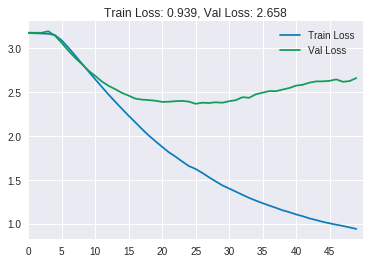

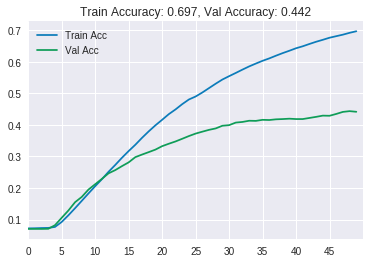

In [0]:
history_aug = load_history('history_aug.bin')
plot_compare(history_aug, steps=50)

In [0]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=500, epochs=50, validation_data = val_generator, validation_steps=100, callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)])


Epoch 1/50
500/500 [==============================] - 663s 1s/step - loss: 2.6013 - acc: 0.2408 - val_loss: 1.8627 - val_acc: 0.4809
Epoch 2/50
239/500 [=============>................] - ETA: 5:19 - loss: 1.6880 - acc: 0.4943

500/500 [==============================] - 652s 1s/step - loss: 1.5187 - acc: 0.5415 - val_loss: 1.4774 - val_acc: 0.5633
Epoch 3/50
367/500 [=====================>........] - ETA: 2:43 - loss: 1.0194 - acc: 0.6834

500/500 [==============================] - 653s 1s/step - loss: 0.9684 - acc: 0.6994 - val_loss: 1.2939 - val_acc: 0.6355
Epoch 4/50
415/500 [=======================>......] - ETA: 1:44 - loss: 0.6669 - acc: 0.7885

500/500 [==============================] - 653s 1s/step - loss: 0.6558 - acc: 0.7932 - val_loss: 1.2489 - val_acc: 0.6858
Epoch 5/50
434/500 [=========================>....] - ETA: 1:21 - loss: 0.4502 - acc: 0.8595

500/500 [==============================] - 653s 1s/step - loss: 0.4490 - acc: 0.8589 - val_loss: 1.0946 - val_acc: 0.7349
Epoch 6/50
441/500 [=========================>....] - ETA: 1:12 - loss: 0.3434 - acc: 0.8895

500/500 [==============================] - 653s 1s/step - loss: 0.3373 - acc: 0.8914 - val_loss: 1.1950 - val_acc: 0.7458
Epoch 7/50
443/500 [=========================>....] - ETA: 1:09 - loss: 0.2466 - acc: 0.9227

500/500 [==============================] - 653s 1s/step - loss: 0.2399 - acc: 0.9244 - val_loss: 1.1995 - val_acc: 0.7714
Epoch 8/50
444/500 [=========================>....] - ETA: 1:08 - loss: 0.1840 - acc: 0.9392

500/500 [==============================] - 652s 1s/step - loss: 0.1848 - acc: 0.9384 - val_loss: 1.1782 - val_acc: 0.7560
Epoch 9/50
445/500 [=========================>....] - ETA: 1:07 - loss: 0.1348 - acc: 0.9564

500/500 [==============================] - 654s 1s/step - loss: 0.1337 - acc: 0.9570 - val_loss: 1.1178 - val_acc: 0.7807
Epoch 10/50
443/500 [=========================>....] - ETA: 1:09 - loss: 0.1085 - acc: 0.9649

500/500 [==============================] - 652s 1s/step - loss: 0.1091 - acc: 0.9649 - val_loss: 1.3252 - val_acc: 0.7550
Epoch 11/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0824 - acc: 0.9745

500/500 [==============================] - 653s 1s/step - loss: 0.0802 - acc: 0.9752 - val_loss: 1.3993 - val_acc: 0.7611
Epoch 12/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0766 - acc: 0.9760

500/500 [==============================] - 652s 1s/step - loss: 0.0769 - acc: 0.9762 - val_loss: 1.1795 - val_acc: 0.7842
Epoch 13/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0694 - acc: 0.9783

500/500 [==============================] - 653s 1s/step - loss: 0.0675 - acc: 0.9791 - val_loss: 1.2967 - val_acc: 0.7785
Epoch 14/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0715 - acc: 0.9773

500/500 [==============================] - 652s 1s/step - loss: 0.0682 - acc: 0.9785 - val_loss: 1.1915 - val_acc: 0.7942
Epoch 15/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0495 - acc: 0.9852

500/500 [==============================] - 652s 1s/step - loss: 0.0496 - acc: 0.9851 - val_loss: 1.3134 - val_acc: 0.7759
Epoch 16/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0526 - acc: 0.9832

500/500 [==============================] - 652s 1s/step - loss: 0.0506 - acc: 0.9839 - val_loss: 1.3565 - val_acc: 0.7845
Epoch 17/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0374 - acc: 0.9883

500/500 [==============================] - 652s 1s/step - loss: 0.0374 - acc: 0.9883 - val_loss: 1.5999 - val_acc: 0.7647
Epoch 18/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0356 - acc: 0.9892

500/500 [==============================] - 651s 1s/step - loss: 0.0353 - acc: 0.9892 - val_loss: 1.2785 - val_acc: 0.7845
Epoch 19/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0273 - acc: 0.9917

500/500 [==============================] - 651s 1s/step - loss: 0.0273 - acc: 0.9915 - val_loss: 1.5028 - val_acc: 0.7749
Epoch 20/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0280 - acc: 0.9922

500/500 [==============================] - 651s 1s/step - loss: 0.0301 - acc: 0.9913 - val_loss: 1.4364 - val_acc: 0.7653
Epoch 21/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0229 - acc: 0.9932

500/500 [==============================] - 651s 1s/step - loss: 0.0219 - acc: 0.9935 - val_loss: 1.3667 - val_acc: 0.7974
Epoch 22/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0237 - acc: 0.9930

500/500 [==============================] - 651s 1s/step - loss: 0.0229 - acc: 0.9935 - val_loss: 1.3763 - val_acc: 0.7868
Epoch 23/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0231 - acc: 0.9936

500/500 [==============================] - 651s 1s/step - loss: 0.0225 - acc: 0.9936 - val_loss: 1.5704 - val_acc: 0.7688
Epoch 24/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0236 - acc: 0.9927

500/500 [==============================] - 651s 1s/step - loss: 0.0225 - acc: 0.9931 - val_loss: 1.3873 - val_acc: 0.7932
Epoch 25/50
442/500 [=========================>....] - ETA: 1:11 - loss: 0.0212 - acc: 0.9941

500/500 [==============================] - 651s 1s/step - loss: 0.0204 - acc: 0.9942 - val_loss: 1.3855 - val_acc: 0.8080
Epoch 26/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0147 - acc: 0.9962

500/500 [==============================] - 651s 1s/step - loss: 0.0154 - acc: 0.9956 - val_loss: 1.3661 - val_acc: 0.7958
Epoch 27/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0199 - acc: 0.9933

500/500 [==============================] - 651s 1s/step - loss: 0.0187 - acc: 0.9938 - val_loss: 1.3313 - val_acc: 0.7951
Epoch 28/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0164 - acc: 0.9951

500/500 [==============================] - 651s 1s/step - loss: 0.0158 - acc: 0.9953 - val_loss: 1.3164 - val_acc: 0.7958
Epoch 29/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0096 - acc: 0.9977

500/500 [==============================] - 650s 1s/step - loss: 0.0103 - acc: 0.9974 - val_loss: 1.4297 - val_acc: 0.7932
Epoch 30/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0155 - acc: 0.9958

500/500 [==============================] - 651s 1s/step - loss: 0.0147 - acc: 0.9959 - val_loss: 1.5477 - val_acc: 0.7916
Epoch 31/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0160 - acc: 0.9957

500/500 [==============================] - 650s 1s/step - loss: 0.0168 - acc: 0.9956 - val_loss: 1.4593 - val_acc: 0.7942
Epoch 32/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0134 - acc: 0.9968

500/500 [==============================] - 651s 1s/step - loss: 0.0137 - acc: 0.9967 - val_loss: 1.4908 - val_acc: 0.7980
Epoch 33/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0093 - acc: 0.9974

500/500 [==============================] - 650s 1s/step - loss: 0.0108 - acc: 0.9969 - val_loss: 1.4287 - val_acc: 0.7980
Epoch 34/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0150 - acc: 0.9956

500/500 [==============================] - 650s 1s/step - loss: 0.0137 - acc: 0.9960 - val_loss: 1.4241 - val_acc: 0.8047
Epoch 35/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0072 - acc: 0.9982

500/500 [==============================] - 650s 1s/step - loss: 0.0068 - acc: 0.9983 - val_loss: 1.5382 - val_acc: 0.7906
Epoch 36/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0085 - acc: 0.9976

500/500 [==============================] - 649s 1s/step - loss: 0.0081 - acc: 0.9977 - val_loss: 1.4751 - val_acc: 0.8086
Epoch 37/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0079 - acc: 0.9973

500/500 [==============================] - 650s 1s/step - loss: 0.0081 - acc: 0.9973 - val_loss: 1.4536 - val_acc: 0.7890
Epoch 38/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0084 - acc: 0.9979

500/500 [==============================] - 648s 1s/step - loss: 0.0102 - acc: 0.9975 - val_loss: 1.3048 - val_acc: 0.8025
Epoch 39/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0119 - acc: 0.9969

500/500 [==============================] - 651s 1s/step - loss: 0.0117 - acc: 0.9970 - val_loss: 1.4275 - val_acc: 0.8031
Epoch 40/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0097 - acc: 0.9968

500/500 [==============================] - 649s 1s/step - loss: 0.0093 - acc: 0.9970 - val_loss: 1.4748 - val_acc: 0.7958
Epoch 41/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0058 - acc: 0.9987

500/500 [==============================] - 650s 1s/step - loss: 0.0064 - acc: 0.9985 - val_loss: 1.5442 - val_acc: 0.7849
Epoch 42/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0129 - acc: 0.9961

500/500 [==============================] - 650s 1s/step - loss: 0.0129 - acc: 0.9961 - val_loss: 1.3978 - val_acc: 0.7906
Epoch 43/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0086 - acc: 0.9975

500/500 [==============================] - 650s 1s/step - loss: 0.0086 - acc: 0.9975 - val_loss: 1.4042 - val_acc: 0.8022
Epoch 44/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0104 - acc: 0.9971

500/500 [==============================] - 650s 1s/step - loss: 0.0100 - acc: 0.9972 - val_loss: 1.4482 - val_acc: 0.7974
Epoch 45/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0113 - acc: 0.9971

500/500 [==============================] - 649s 1s/step - loss: 0.0110 - acc: 0.9972 - val_loss: 1.4750 - val_acc: 0.7906
Epoch 46/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0069 - acc: 0.9983

500/500 [==============================] - 649s 1s/step - loss: 0.0068 - acc: 0.9984 - val_loss: 1.4392 - val_acc: 0.8047
Epoch 47/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0050 - acc: 0.9985

500/500 [==============================] - 649s 1s/step - loss: 0.0066 - acc: 0.9981 - val_loss: 1.8499 - val_acc: 0.7643
Epoch 48/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0054 - acc: 0.9990

500/500 [==============================] - 650s 1s/step - loss: 0.0052 - acc: 0.9991 - val_loss: 1.4699 - val_acc: 0.8041
Epoch 49/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0079 - acc: 0.9979

500/500 [==============================] - 650s 1s/step - loss: 0.0076 - acc: 0.9979 - val_loss: 1.4171 - val_acc: 0.8035
Epoch 50/50
442/500 [=========================>....] - ETA: 1:10 - loss: 0.0057 - acc: 0.9984

500/500 [==============================] - 649s 1s/step - loss: 0.0058 - acc: 0.9983 - val_loss: 1.5206 - val_acc: 0.7894
